# Introduction to Python for Data Exploration and Statistics


Thus far we have been learning Python basics. These are great for computer scientists, but of course, what we as social scientists and humanists want to do is analyze data (which we learned last week is objectified information!). This week we'll analyze reall data using our first Python module, also called a library or package, called Pandas. A module is simply bundles of functions other people wrote that you will then re-use. You have to first install a module before you can use it. If you installed the Anaconda distribution of Python Pandas, and most of the modules we will use, comes pre-installed. If you did not install the Anaconda distribution you will have to install Pandas yourself (using `pip` or some other method).

Like Python, each module has its own syntax that you have to learn how to write correctly. We'll start to learn the Pandas syntax today.

<i>Pandas</i> is a popular and flexible package whose primary use is its datatype: the <i>DataFrame</i>. The dataframe is essentially a spreadsheet, like you would find in Excel, but it has some tricks up its sleeve!

As we will see, Pandas allows us to do basic statistics easily, allows us to compare columns, and allows us to do quick and easy visualizations. 

We will keep practicing these uses of Pandas throughout the semester. Today, I'm just planting the seed.


# Reminder: our growing Python toolkit

It's always helpful to keep in mind all the tools we have learned. We will continue to use these throughout the semester. I'll list some important ones here, just to keep reinforcing what we've learned.

* values (e.g. `1.2`, `100`, `'Hello, Boston!'`)
* variables (e.g., `float`, `int`, `string`)
* operators (e.g., `=`, `+`, `-`)
* logical operators (e.g., `==`, `>`, `<`, `>=`)
* statements and expressions (e.g. `10 + 500`)
* built-in functions (e.g. `print()`, `type()`)
* string functions and string methods (e.g., `string.lower()`, `string.islower()`)
* list functions and list methods (e.g., `len(mylist)`, `mylist.append()`)
* conditionals (e.g., `if`, `else`, `elif`)
* loops (e.g., `for` loops)

# Relative File Structures

We will need to read in a file from our hard drive (our secondary memory) into our primary memory. We're going to use Pandas functions to do this today, as we'll be working with dataframes, but later we'll read in plain text files.

We will use the *relative* file structure to do so, in order to make our code reproducible. You should put this script in your `scripts` folder, and you should put the .csv in your `data` folder. If you don't do this correctly, you'll get an error below that we'll trouble shoot.

I found [this blog] (https://desktop.arcgis.com/en/arcmap/10.3/tools/supplement/pathnames-explained-absolute-relative-unc-and-url.htm) offers a good explanation for files and file structures. To quote from that blog:

> Relative path
> A relative path refers to a location that is relative to a current directory. Relative paths make use of two special symbols, a dot (.) and a double-dot (..), which translate into the current directory and the parent directory. Double dots are used for moving up in the hierarchy. A single dot represents the current directory itself.
> 
> In the example directory structure below, assume you used Windows Explorer to navigate to D:\Data\Shapefiles\Soils. After navigating to this directory, a relative path will use D:\Data\Shapefiles\Soils as the current directory (until you navigate to a new directory, at which point the new directory becomes the current directory). The current directory is sometimes referred to as the root directory.
> 
> If you wanted to navigate to the Landuse directory from the current directory (Soils), you could type the following in the Windows Explorer Address box:
> 
> ..\\Landuse
Windows Explorer would navigate to D:\Data\Shapefiles\Landuse. A few more examples using D:\Data\Shapefiles\Landuse as the current directory are below:
> 
> ..               (D:\Data\Shapefiles)  
> ..\\..            (D:\Data)  
> ..\\..\Final      (D:\Data\Final)  
> .                (D:\Data\Shapefiles\Landuse - the current directory)  
> .\\..\Soils       (D:\Data\Final\Soils)  
> ..\\..\\.\Final\\..\Shapefiles\.\Landuse  (D:\Data\Shapefiles\Landuse)



# The Pandas Dataframe

We're going to jump into Pandas using real data.

******************************
The data we'll analyze today comes from:

National Center for Education Statistics, United States Department of Education. (2009). Early Childhood Longitudinal Study, Kindergarten Class of 1998-99 (ECLS-K) [Data file]. Available from http://nces.ed.gov/ecls/kindergarten.asp

I selected five variables (columns) to analyze:

* reading_score = READING IRT SCALE SCORE
* math_score = MATH IRT SCALE SCORE
* knowledge_score = GENERAL KNOWLEDGE IRT SCALE SCORE
* p2income = TOTAL HOUSEHOLD INCOME
* incomecat = INCOME CATEGORES
    * 1 = low income: < \$40,000
    * 2 = mid income
    * 3 = high income: >= \$70,000
    
The unit of observation (row) is the individual kindergartner. The file is a comma-separated file, with utf-8 encoding.
   
## Motivating Question

**Are math, reading, and general knowledge scores related to household income in any predictable way?**


In [2]:
#import our library
#this is the simplest way to import a module
# if you get a `module not found` error it means you have not installed this particular module
import pandas

Like Python more generally, Pandas relies on functions. These are not in-built functions in Python, but Pandas-specific functions. We will use the `read_csv()` function, and note the `pandas` prefix: `pandas.read_csv()`.

In [3]:
#Note the relative file structure
#We'll go up one directory, and then down into the `data/` directory:

df = pandas.read_csv("../data/education_dataset.csv", sep=',', encoding='utf8')

#always check your data type!
type(df)

pandas.core.frame.DataFrame

In [4]:
#It's a pandas object - only pandas functions will work on it
#Let's take a look using the head() function

df.head()

,reading_score,math_score,knowledge_score,p2income,incomecat
0,36.58,39.54,33.822,140000.0,3
1,50.82,44.44,38.147,120000.0,3
2,40.68,28.57,28.108,90000.0,3
3,32.57,23.57,15.404,50000.0,2
4,31.98,19.65,18.727,55000.0,2


In [5]:
#or view the entire dataframe
df

,reading_score,math_score,knowledge_score,p2income,incomecat
0,36.58,39.54,33.822,140000.0,3
1,50.82,44.44,38.147,120000.0,3
2,40.68,28.57,28.108,90000.0,3
3,32.57,23.57,15.404,50000.0,2
4,31.98,19.65,18.727,55000.0,2
...,...,...,...,...,...
11928,32.51,25.68,11.694,39000.0,1
11929,31.96,25.73,21.461,26000.0,1
11930,40.44,30.50,16.836,45000.0,2
11931,35.51,28.96,28.864,28000.0,1


## Dataframe slicing 

Like list and string slicing, but with some quirks to use with dataframes

In [6]:
#syntax to extract columns
#note the helpful metadata on the last line printed
df['reading_score']

0        36.58
1        50.82
2        40.68
3        32.57
4        31.98
         ...  
11928    32.51
11929    31.96
11930    40.44
11931    35.51
11932    23.47
Name: reading_score, Length: 11933, dtype: float64

In [7]:
#helpful not to always look at the entire thing
df['reading_score'].head()

0    36.58
1    50.82
2    40.68
3    32.57
4    31.98
Name: reading_score, dtype: float64

In [8]:
#extract one row: notice the syntax
df.iloc[0]

reading_score          36.580
math_score             39.540
knowledge_score        33.822
p2income           140000.000
incomecat               3.000
Name: 0, dtype: float64

## Summary Statistics

Ok, we know what we want to do with quantitative dataframes, we want to summarize them.

In [9]:
## Summary statistics
df['reading_score'].mean()

35.95421520154177

In [10]:
df['reading_score'].sum()

429041.65

In [11]:
df['reading_score'].std()

10.473129881360551

In [12]:
# Or, we can find it all at the same time (for quantitative columns)

df.describe()

,reading_score,math_score,knowledge_score,p2income,incomecat
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,54317.199930,1.895165
std,10.473130,9.120505,7.396978,36639.061147,0.822692
min,21.010000,10.510000,6.985000,1.000000,1.000000
25%,29.340000,20.680000,17.385000,27000.000000,1.000000
50%,34.060000,25.680000,22.954000,47000.000000,2.000000
75%,39.890000,31.590000,28.305000,72000.000000,3.000000
max,138.510000,115.650000,47.691000,150000.000000,3.000000


## Differences between means 

What if we want to know if the mean is different across categories? This is one of the more common uses of data analysis. For example, we might want to know of the average wage is different for men and women. We don't have gender in our data, but we do have income category (see the description above). We'll use that to compare means across our three scores. Remember our motivating question:

**Are math, reading, and general knowledge scores related to household income in any predictable way?**


First step, are the average different for each of our income categories?

To do so, we can use two methods.

First, the "manual" method. We'll use boolean statements to create three separate dataframes.

In [13]:
#Use of boolean operators with dataframes:
df['incomecat']==1

0        False
1        False
2        False
3        False
4        False
         ...  
11928     True
11929     True
11930    False
11931     True
11932     True
Name: incomecat, Length: 11933, dtype: bool

In [14]:
#slice out the rows where the condition is true, and 
df[df['incomecat']==1].head()

,reading_score,math_score,knowledge_score,p2income,incomecat
10,26.77,15.97,11.269,2000.0,1
12,27.90,20.23,21.195,9000.0,1
13,32.05,20.27,14.700,18000.0,1
15,27.46,13.92,18.558,35000.0,1
16,37.42,29.90,20.702,30000.0,1


In [15]:
#save it as a new variable, including our other income categories:
df_incomecat1 = df[df['incomecat']==1]
df_incomecat2 = df[df['incomecat']==2]
df_incomecat3 = df[df['incomecat']==3]

In [16]:
#now, print our our means

print(df_incomecat1['reading_score'].mean())
print(df_incomecat2['reading_score'].mean())
df_incomecat3['reading_score'].mean()

32.78679847747938
36.29251744498117


39.89849338700407

In [ ]:
df_incomecat1['reading_score'].mean()
df_incomecat2['reading_score'].mean()
df_incomecat3['reading_score'].mean()

In [17]:
#Pandas has a way to do this without creating new dataframes! The Pandas groupby function
#create a new dataframe that is grouped by income category

df_grouped = df.groupby('incomecat')
df_grouped

In [18]:
df_grouped['reading_score'].mean()

incomecat
1    32.786798
2    36.292517
3    39.898493
Name: reading_score, dtype: float64

# Visualization

We can also use visualizations to explore our data. We'll just touch on this today. We'll learn how to make pretty visualizations later.

We'll use another library for this: `matplotlib`, the most popular Python visualization libarary

In [19]:
#note the different syntax here, we're going to rename the library to something shorter when we import it
import matplotlib.pyplot as plt

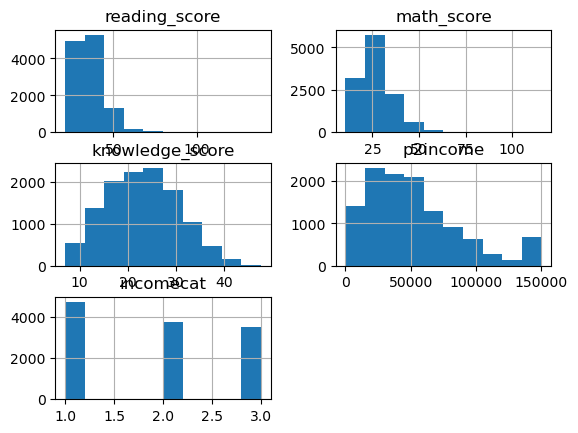

In [20]:
#Always start with histograms!
df.hist()
plt.show()

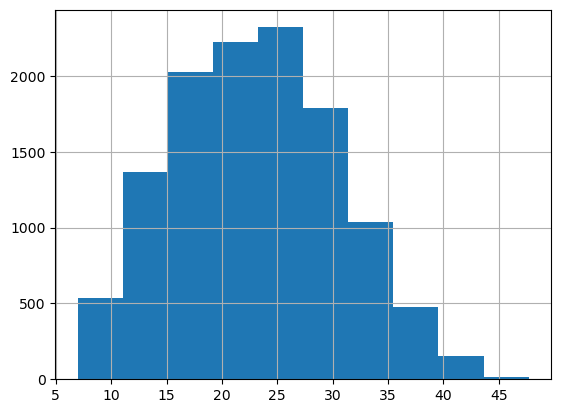

In [21]:
#That's not pretty. Let's show just one

df['knowledge_score'].hist()
plt.show()

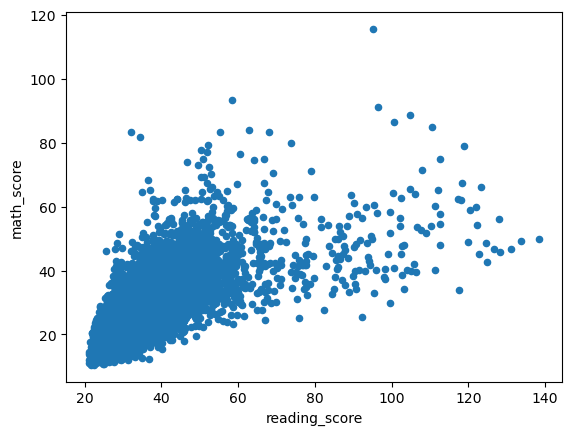

In [22]:
#Other options:
#Scatter plot: is math and reading scores correlated?
#note the synax: this is the basic syntax for plotting

df.plot(kind='scatter', x = 'reading_score', y = 'math_score')
plt.show()

In [23]:
## Plot average by income
## remember our grouped by plot
## Let's first make another dataframe from it

df_grouped_mean = df_grouped.mean()
df_grouped_mean

,reading_score,math_score,knowledge_score,p2income
incomecat,,,,
1,32.786798,23.924504,19.947683,22019.718482
2,36.292517,27.568468,23.887885,51742.759528
3,39.898493,31.012720,26.451851,100989.757352


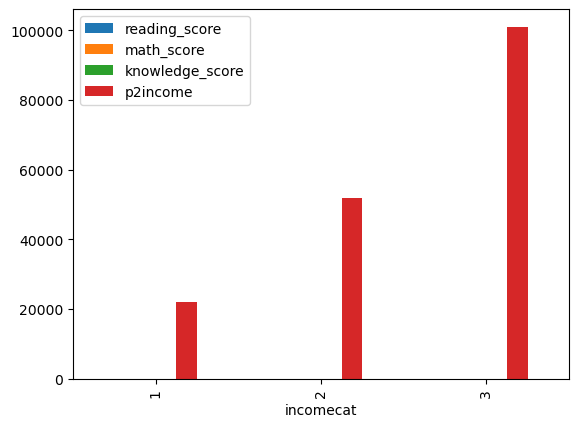

In [24]:
## We can plot this like we would the original dataframe!

df_grouped_mean.plot(kind='bar')
plt.show()
#income is so high that the other three shrinked to invisible

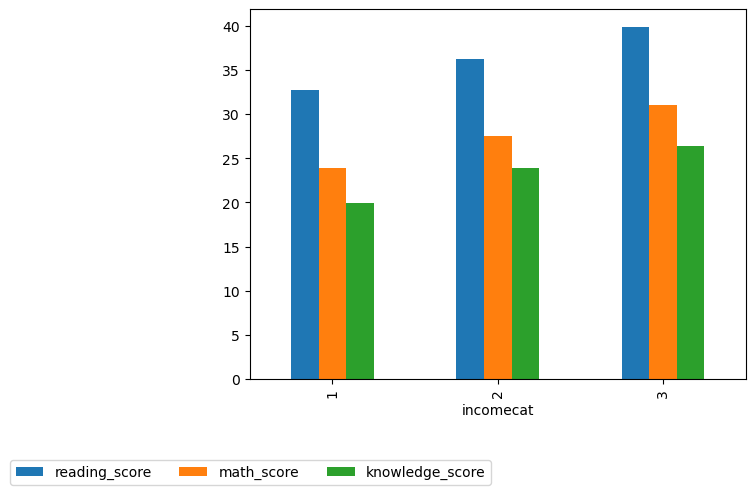

In [26]:
#Not great! What's the issue?

#Let's pull out three columns: notice the syntax - double brackets!

df_grouped_mean[['reading_score', 'math_score', 'knowledge_score']].plot(kind='bar')
plt.legend(loc=0, bbox_to_anchor=(0.5, -0.2), ncol = 3)
plt.show()

In [ ]:
#Different way of doing this
df_grouped_mean.drop('p2income', axis=1).plot(kind='bar')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol = 3)
plt.show()
#axis=1 means vertical, axis=0 means horizontal

# Exercises!

In [32]:
## Exercise 1: Slice out and print the knowledge score column 
#from the dataframe (df)
df['knowledge_score']

0        33.822
1        38.147
2        28.108
3        15.404
4        18.727
          ...  
11928    11.694
11929    21.461
11930    16.836
11931    28.864
11932    15.256
Name: knowledge_score, Length: 11933, dtype: float64

In [33]:
## Exercise 2: extract the third row in the dataframe 
#(careful! remember that Python indexes start at 0)
df.iloc[2]

reading_score         40.680
math_score            28.570
knowledge_score       28.108
p2income           90000.000
incomecat              3.000
Name: 2, dtype: float64

In [28]:
##Exercise 3: find the mean, median, and standard deviation for 
#the knowledge score column.
# Note: I didn't teach you median, but see if you can recognize patterns and intuit how to do it.
df['knowledge_score'].describe()
#mean =23.07
#median=22.95
#std=7.40

count    11933.000000
mean        23.073694
std          7.396978
min          6.985000
25%         17.385000
50%         22.954000
75%         28.305000
max         47.691000
Name: knowledge_score, dtype: float64

In [30]:
#Exercise 4: print out the mean knowledge score separately 
# for those in income categories 1, 2, and 3 respetively.
df_grouped = df.groupby('incomecat')
df_grouped['knowledge_score'].mean()

incomecat
1    19.947683
2    23.887885
3    26.451851
Name: knowledge_score, dtype: float64

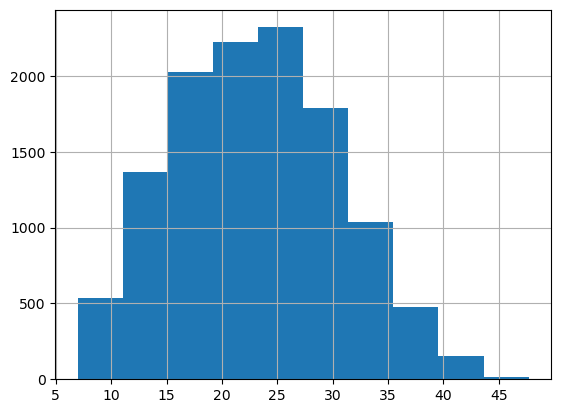

In [31]:
#Exercise 5: produce a histogram of the knowledge score column
df['knowledge_score'].hist()
plt.show()

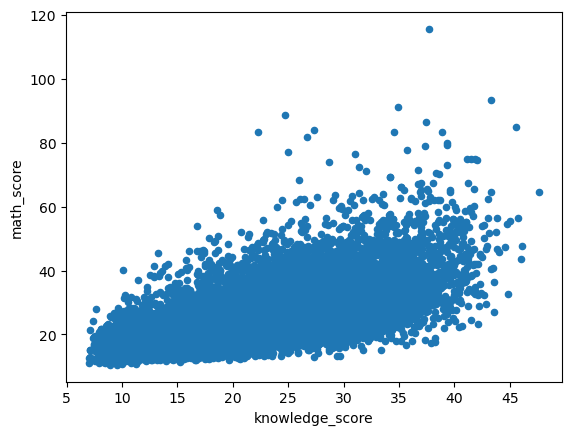

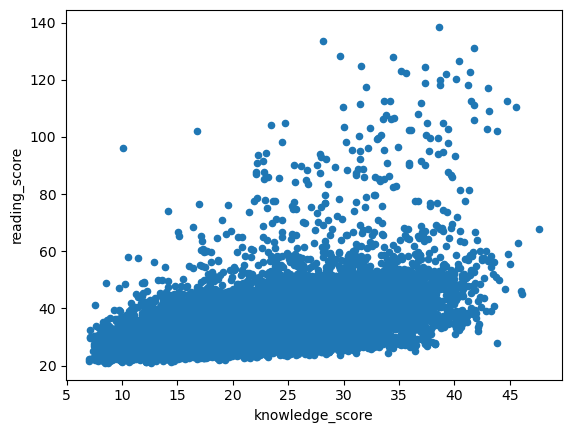

In [35]:
#Exercise 6: just based on visuals alone, 
#is there a stronger relationship between math score and general knowledge,
#Or reading score and general knowledge?
df.plot(kind='scatter', x = 'knowledge_score', y = 'math_score')
plt.show()
df.plot(kind='scatter', x = 'knowledge_score', y = 'reading_score')
plt.show()
#yes

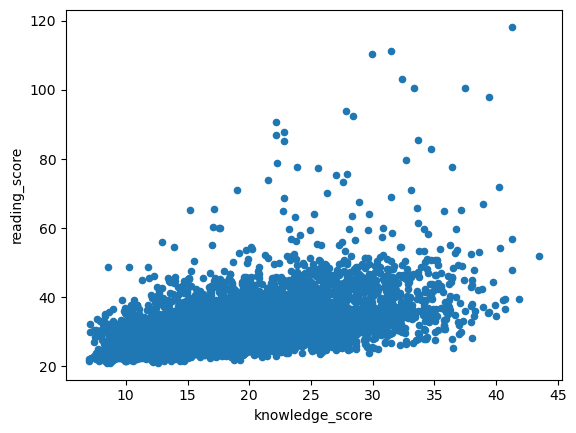

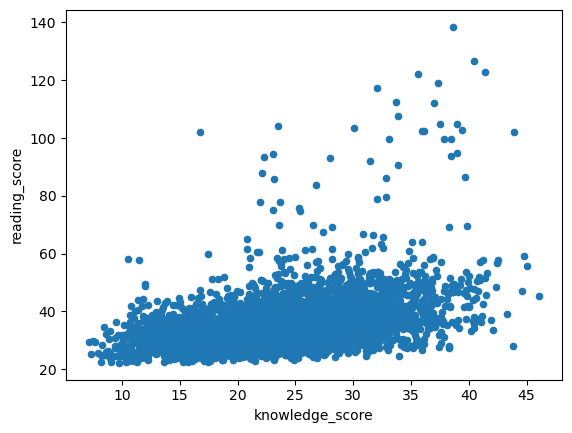

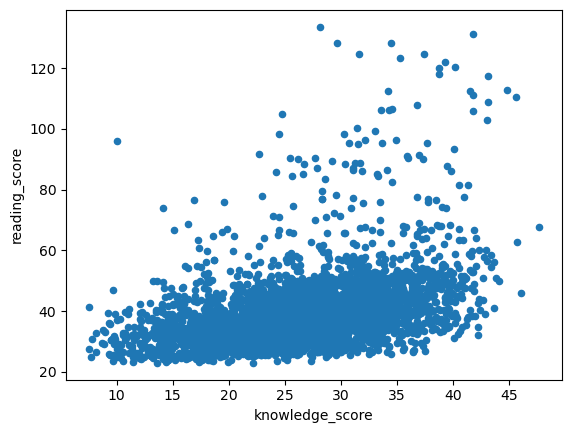

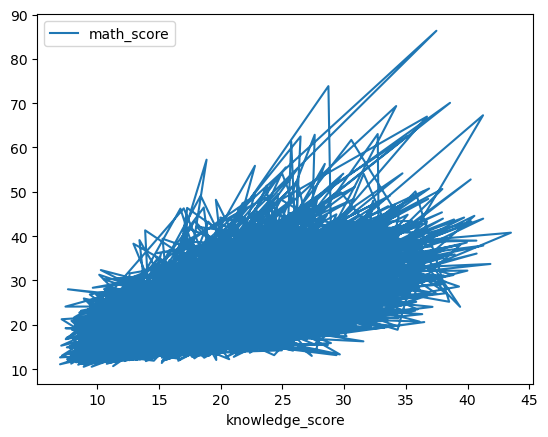

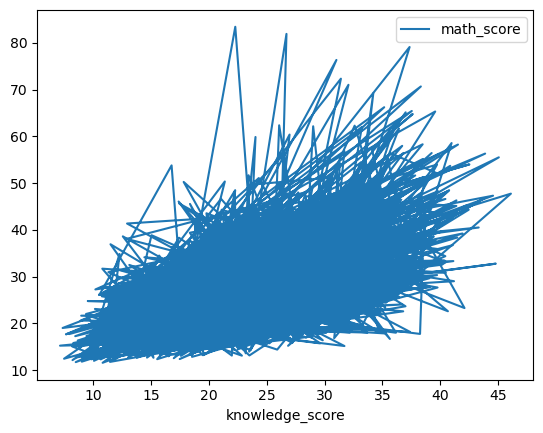

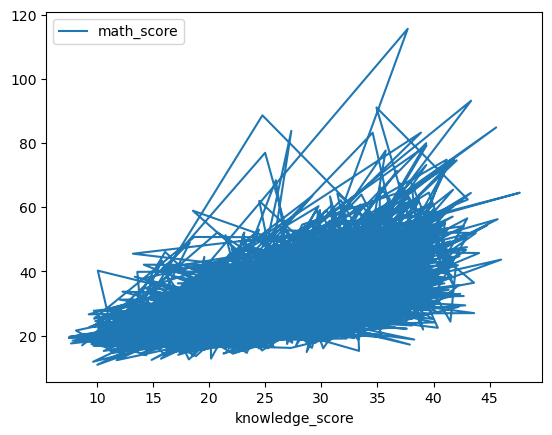

4729
3726


3478

In [46]:
# Exercise 7: Do something creative! What other visualizations can you produce? What other relationships?
# Maybe produce different scatter plots from our three dataframes from the different income categores
# e.g. df_incomecat1, df_incomecat2, df_incomecate3.
# Are the relationships between variables stronger in different income categories? (visually inspected)
df_grouped.plot(kind='scatter', x = 'knowledge_score', y = 'reading_score')
plt.show()
df_grouped.plot(x = 'knowledge_score', y = 'math_score')
plt.show()
print(len(df[df['incomecat']==1]))
print(len(df[df['incomecat']==2]))
len(df[df['incomecat']==3])
#the relationships between variables stronger in income category 1, 
#because the outliers seem less than the other two categories,
#and the observations in category 1 is the most
# If you want, check out the matplotlib documentation and see if you can do things like change colors,
# change axis names, or other features of your visualizations.